In [ ]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
#importing the dataset
df=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [ ]:
# preview the dataset
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# view dimensions of dataset
df.shape

(299, 13)

In [ ]:
#view the datatype of the variables
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
# check missing values in variables
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
#checking for outliers
from scipy import stats
z = np.abs(stats.zscore(df)) 
print(z) #printing the z-score

[[1.19294523e+00 8.71104775e-01 1.65728387e-04 ... 6.87681906e-01
  1.62950241e+00 1.45416070e+00]
 [4.91279276e-01 8.71104775e-01 7.51463953e+00 ... 6.87681906e-01
  1.60369074e+00 1.45416070e+00]
 [3.50832977e-01 8.71104775e-01 4.49938761e-01 ... 1.45416070e+00
  1.59078490e+00 1.45416070e+00]
 ...
 [1.33339153e+00 8.71104775e-01 1.52597865e+00 ... 6.87681906e-01
  1.90669738e+00 6.87681906e-01]
 [1.33339153e+00 8.71104775e-01 1.89039811e+00 ... 1.45416070e+00
  1.93250906e+00 6.87681906e-01]
 [9.12335403e-01 8.71104775e-01 3.98321274e-01 ... 1.45416070e+00
  1.99703825e+00 6.87681906e-01]]


In [ ]:
#printing the dimensions of the cells with z-score more than 3
print(np.where(z > 3)) 

(array([  1,   4,   9,  19,  28,  52,  52,  60,  64,  72, 103, 105, 109,
       131, 134, 171, 199, 217, 228, 296]), array([2, 8, 7, 8, 7, 2, 7, 2, 4, 2, 2, 6, 6, 7, 2, 2, 8, 7, 7, 6]))


In [ ]:
#checking the z-score
print(z[1][2]) 

7.514639528854929


In [ ]:
#storing the data without the outliers ina new variable
x1=df[(z < 3).all(axis=1)] 

In [ ]:
df.shape

(299, 13)

In [ ]:
x1.shape

(280, 13)

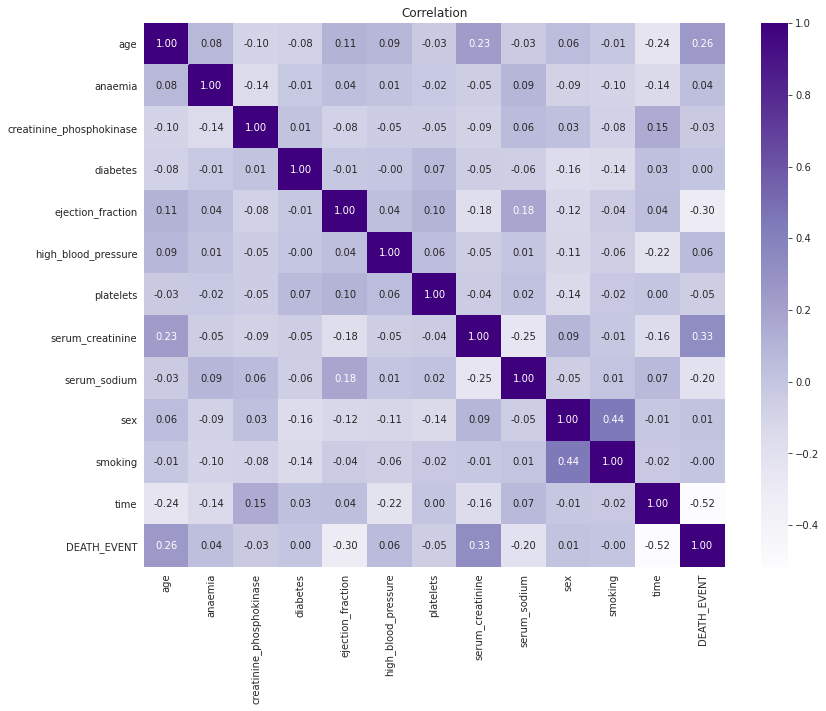

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

plt.figure(figsize=(13,10))
col=x1.corr()
sns.heatmap(col,annot=True,fmt='.2f',cmap="Purples");
plt.title("Correlation")
plt.show()

#Not much relation is seen in features

In [ ]:
import plotly.express as px
fig = px.histogram(x1, x="time", color="DEATH_EVENT", marginal="box", hover_data=x1.columns)
fig.show()
#Here we can see maximum deaths are in range of 58-62 And 
#as age is increasing the chances of dying is increasing as compared to not dying

In [ ]:
import plotly.graph_objs as go
diabetic = x1[x1["diabetes"]==1]
non_diabetic = x1[x1["diabetes"]==0]


labels = ['diabetic - Survived','diabetic - Not Survived', "non diabetic -  Survived", "non diabetic - Not Survived"]
values = [len(diabetic[df["DEATH_EVENT"]==0]),len(diabetic[df["DEATH_EVENT"]==1]),
          len(non_diabetic[df["DEATH_EVENT"]==0]),len(non_diabetic[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis on Survival - Gender")
fig.show()

#chances of Surviving without diabetes is greater than chances of surviving with diabetes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
#Declare feature variables and target variable
x=x1.drop("DEATH_EVENT", axis=1)
y=x1["DEATH_EVENT"]

In [ ]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [ ]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=2, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
score1=accuracy_score(y_test, y_pred1)
print(score1)

[[33  6]
 [ 2 15]]
0.8035714285714286


In [ ]:
#Using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
score2=accuracy_score(y_test, y_pred2)
print(score2)

[[34  5]
 [ 5 12]]
0.8214285714285714


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
score3=accuracy_score(y_test, y_pred3)
print(score3)

[[33  6]
 [ 2 15]]
0.8571428571428571
